In [1]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
iris_data = load_iris()

In [2]:
iris_data

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

# Problem 1
Load data

In [3]:
x=pd.DataFrame(iris_data.data)
y=pd.DataFrame(iris_data.target)
x.columns = [s.strip('(cm)') for s in iris_data.feature_names]
y.columns = ["species"]
print(x.head(5))
y.head(5)

   sepal length   sepal width   petal length   petal width 
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


,species
0,0
1,0
2,0
3,0
4,0


# Problem 2
Combine data

In [4]:
df = pd.concat([x,y],axis=1)
df.head(3)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


# Problem 3
checking the data

In [5]:
# dataframe characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length     150 non-null float64
sepal width      150 non-null float64
petal length     150 non-null float64
petal width      150 non-null float64
species          150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.3 KB


In [6]:
# 4th sample from the beginning
df.iloc[3]

sepal length     4.6
sepal width      3.1
petal length     1.5
petal width      0.2
species          0.0
Name: 3, dtype: float64

In [7]:
# number of samples per each label
df.species.value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [8]:
# missing values
print ("Is there any missing values:",df.isnull().sum().sum())

Is there any missing values: 0


In [9]:
# mean and std
print(df.mean())
print(df.std())

sepal length     5.843333
sepal width      3.054000
petal length     3.758667
petal width      1.198667
species          1.000000
dtype: float64
sepal length     0.828066
sepal width      0.433594
petal length     1.764420
petal width      0.763161
species          0.819232
dtype: float64


In [10]:
# basic statistics
df.iloc[:,0:4].describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Problem 4
Examining the iris dataset itself

In [11]:
setosa = df.loc[df['species']==0]
versicolor = df.loc[df['species']==1]
virginica = df.loc[df['species']==2]

In [12]:
print(setosa.iloc[:,0:4].mean(axis=0))
print(versicolor.iloc[:,0:4].mean())
print(virginica.iloc[:,0:4].mean())

sepal length     5.006
sepal width      3.418
petal length     1.464
petal width      0.244
dtype: float64
sepal length     5.936
sepal width      2.770
petal length     4.260
petal width      1.326
dtype: float64
sepal length     6.588
sepal width      2.974
petal length     5.552
petal width      2.026
dtype: float64


Versicolor and Virginica has similar lenght and width of the sepals and petals. <br>
Setosa has quite small petals compared to other two types, but wider sepals. 

# Problem 5
Extracting the required data

In [16]:
# Extract sepal_width, columns in three different ways
df.loc[:,'sepal width ']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
5      3.9
6      3.4
7      3.4
8      2.9
9      3.1
10     3.7
11     3.4
12     3.0
13     3.0
14     4.0
15     4.4
16     3.9
17     3.5
18     3.8
19     3.8
20     3.4
21     3.7
22     3.6
23     3.3
24     3.4
25     3.0
26     3.4
27     3.5
28     3.4
29     3.2
      ... 
120    3.2
121    2.8
122    2.8
123    2.7
124    3.3
125    3.2
126    2.8
127    3.0
128    2.8
129    3.0
130    2.8
131    3.8
132    2.8
133    2.8
134    2.6
135    3.0
136    3.4
137    3.1
138    3.0
139    3.1
140    3.1
141    3.1
142    2.7
143    3.2
144    3.3
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width , Length: 150, dtype: float64

In [17]:
df.iloc[:,1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
5      3.9
6      3.4
7      3.4
8      2.9
9      3.1
10     3.7
11     3.4
12     3.0
13     3.0
14     4.0
15     4.4
16     3.9
17     3.5
18     3.8
19     3.8
20     3.4
21     3.7
22     3.6
23     3.3
24     3.4
25     3.0
26     3.4
27     3.5
28     3.4
29     3.2
      ... 
120    3.2
121    2.8
122    2.8
123    2.7
124    3.3
125    3.2
126    2.8
127    3.0
128    2.8
129    3.0
130    2.8
131    3.8
132    2.8
133    2.8
134    2.6
135    3.0
136    3.4
137    3.1
138    3.0
139    3.1
140    3.1
141    3.1
142    2.7
143    3.2
144    3.3
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width , Length: 150, dtype: float64

In [26]:
df = df.rename(columns={'sepal width ': 'sepal_width'})
df.sepal_width

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
5      3.9
6      3.4
7      3.4
8      2.9
9      3.1
10     3.7
11     3.4
12     3.0
13     3.0
14     4.0
15     4.4
16     3.9
17     3.5
18     3.8
19     3.8
20     3.4
21     3.7
22     3.6
23     3.3
24     3.4
25     3.0
26     3.4
27     3.5
28     3.4
29     3.2
      ... 
120    3.2
121    2.8
122    2.8
123    2.7
124    3.3
125    3.2
126    2.8
127    3.0
128    2.8
129    3.0
130    2.8
131    3.8
132    2.8
133    2.8
134    2.6
135    3.0
136    3.4
137    3.1
138    3.0
139    3.1
140    3.1
141    3.1
142    2.7
143    3.2
144    3.3
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [27]:
# Extract the 50th to 99th data of sepal_width
df.iloc[50:100,1]

50    3.2
51    3.2
52    3.1
53    2.3
54    2.8
55    2.8
56    3.3
57    2.4
58    2.9
59    2.7
60    2.0
61    3.0
62    2.2
63    2.9
64    2.9
65    3.1
66    3.0
67    2.7
68    2.2
69    2.5
70    3.2
71    2.8
72    2.5
73    2.8
74    2.9
75    3.0
76    2.8
77    3.0
78    2.9
79    2.6
80    2.4
81    2.4
82    2.7
83    2.7
84    3.0
85    3.4
86    3.1
87    2.3
88    3.0
89    2.5
90    2.6
91    3.0
92    2.6
93    2.3
94    2.7
95    3.0
96    2.9
97    2.9
98    2.5
99    2.8
Name: sepal_width, dtype: float64

In [28]:
# Extract the50th to 99th data of the petal_length column
df.iloc[50:100,2]

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal length , dtype: float64

In [29]:
# Extract data with a petal_width value of 0.2
df.loc[df['petal width ']==0.2]

,sepal length,sepal_width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


.loc gets rows or columns with labels from the index <br>
.iloc gets at particular int index

# Problem 6
Creating a diagram

[50, 50, 50]


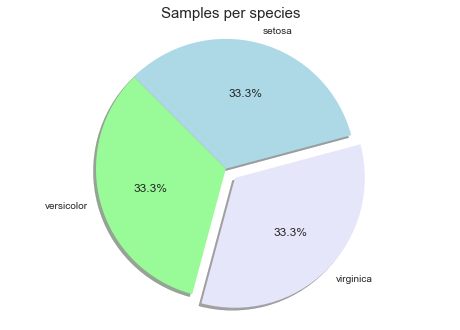

In [30]:
# Make a pie chart of the number of samples per label (while showing percentages)
samples = []
for i in df['species'].unique():
    samples.append(len(df.loc[df['species']==i]))
print(samples)
labels = iris_data.target_names
explode = (0, 0, 0.1)
plt.pie(samples, labels=labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=['lightblue','palegreen','lavender'], explode=explode)
plt.title('Samples per species', fontsize=15)
plt.axis('equal')
plt.show()

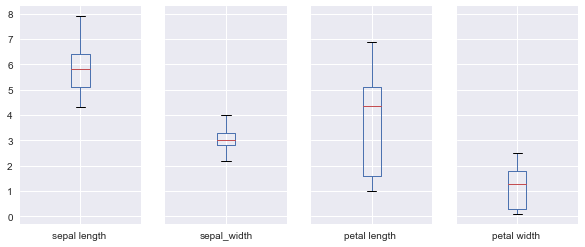

In [31]:
# Select features one by one and visualize the distribution of data for each label using a box plot
fig, ax = plt.subplots(1,4,figsize=(10,4),sharey=True)
df.boxplot(column=df.columns[0], ax=ax[0]) 
df.boxplot(column=df.columns[1], ax=ax[1])
df.boxplot(column=df.columns[2], ax=ax[2])
df.boxplot(column=df.columns[3], ax=ax[3])
plt.show()

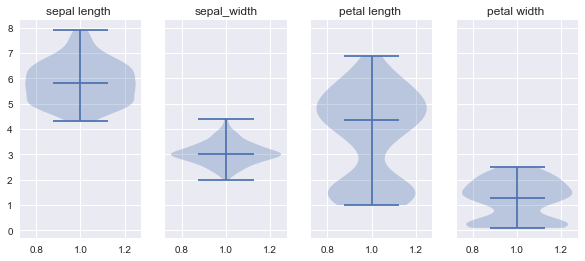

In [32]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(10,4),sharey=True)
ax1.violinplot(df[df.columns[0]], showmedians=True)
ax1.set_title(df.columns[0])
ax2.violinplot(df[df.columns[1]], showmedians=True)
ax2.set_title(df.columns[1])
ax3.violinplot(df[df.columns[2]], showmedians=True)
ax3.set_title(df.columns[2])
ax4.violinplot(df[df.columns[3]], showmedians=True)
ax4.set_title(df.columns[3])
plt.show()

Boxplot shows only mean,median and interquartile range statistics <br>
Violinplot shows the full distribution of the data 

# Problem 7
Confirming the relationship between features

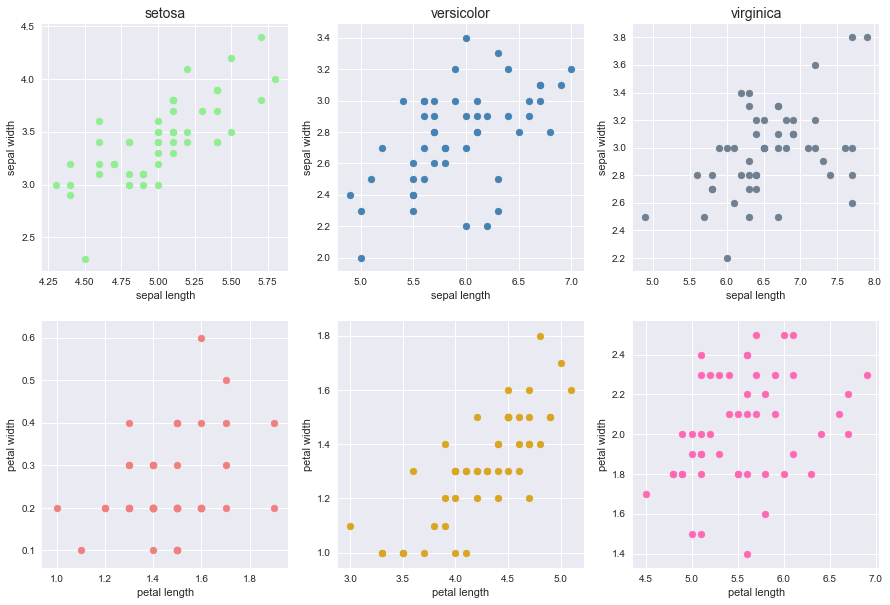

In [33]:
# Take one feature for each of the vertical and horizontal axes and create a color-coded scatter plot for each type (6)
fig, ((ax1, ax2, ax3), (ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(15,10))
ax1.scatter(setosa['sepal length '],setosa['sepal width '],color='lightgreen')
ax1.set_xlabel('sepal length')
ax1.set_ylabel('sepal width')
ax1.set_title('setosa',fontsize=14)
ax4.scatter(setosa['petal length '],setosa['petal width '],color='lightcoral')
ax4.set_xlabel('petal length')
ax4.set_ylabel('petal width')
ax2.scatter(versicolor['sepal length '],versicolor['sepal width '],color='steelblue')
ax2.set_xlabel('sepal length')
ax2.set_ylabel('sepal width')
ax2.set_title('versicolor',fontsize=14)
ax5.scatter(versicolor['petal length '],versicolor['petal width '],color='goldenrod')
ax5.set_xlabel('petal length')
ax5.set_ylabel('petal width')
ax3.scatter(virginica['sepal length '],virginica['sepal width '],color='slategrey')
ax3.set_xlabel('sepal length')
ax3.set_ylabel('sepal width')
ax3.set_title('virginica',fontsize=14)
ax6.scatter(virginica['petal length '],virginica['petal width '],color='hotpink')
ax6.set_xlabel('petal length')
ax6.set_ylabel('petal width')
plt.show()

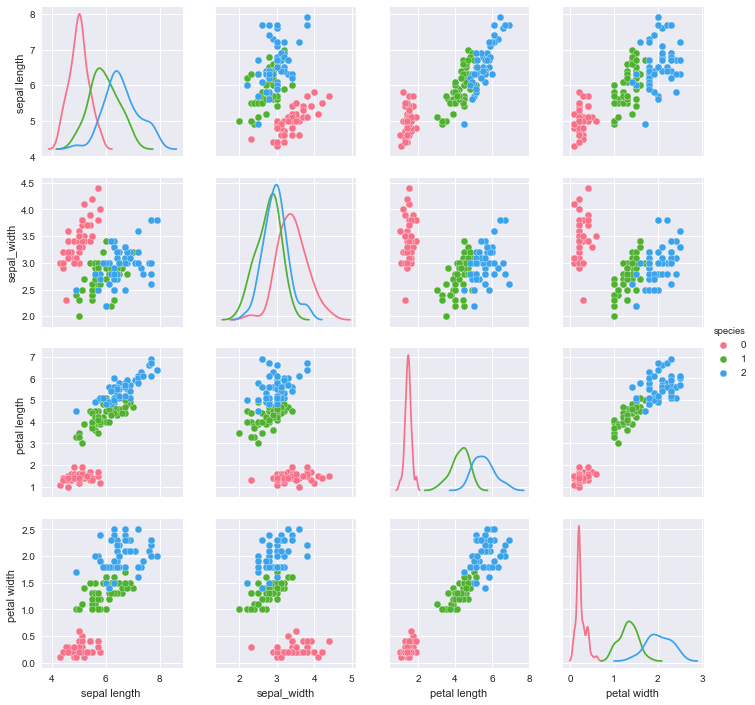

In [36]:
# Create a scatterplot matrix that displays all combinations of scatterplots at once (1)
sns.pairplot(df, hue="species", vars=['sepal length ','sepal_width','petal length ', 'petal width '],palette="husl",diag_kind="kde")
sns.plt.show()

In [37]:
# Create a correlation coefficient matrix for 4 features
cormat = df.iloc[:,0:4].corr()
cormat

,sepal length,sepal_width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


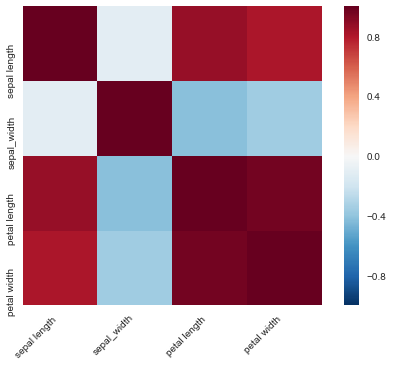

In [38]:
# Make a heat map of the correlation coefficient matrix (1)
ht = sns.heatmap(cormat, vmin=-1, vmax=1, center=0, square=True)
ht.set_xticklabels(ht.get_xticklabels(),rotation=45, horizontalalignment='right');
sns.plt.show()

# Problem 8
Explaining the results of visualized graphs and tables

1. Looking at the scatterplot matrix in Problem 7, we can see that <br>
Versicolor and Virginica has similar lenght and width of the sepals and petals.
Setosa has quite different lenght and width of sepals and petals compared to other two types. 
2. Looking at the violinplot and boxplot in Problem 6, we can see that <br>
Irises has longer sepal lenght compared to petal lenght. 
Bigger sepals compared to petals. 
3. Looking at the heatmap in Problem 7, we can se that <br>
Strong correlation between petal length and petal width. 